# Генерация случайных чисел

ЗАДАЧА 1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

The generation time of the sample -->  0.006830930709838867


Text(0.5, 1.0, 'Выборка с неупорядоченными весами')

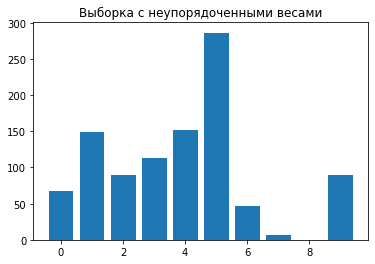

In [5]:
A = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
A /= A.sum()
B = [A[:i].sum() for i in range(1,11)]
Rand = [np.random.rand() for i in range(1000)]
C = []
start_time = time.time()
for i in range(1000):
    t = 0
    while t != - 1:
        if Rand[i] < B[t]:
            C.append(t)
            t = - 1
        else:
            t += 1
end_time = time.time()
print("The generation time of the sample --> ", end_time - start_time)
plt.bar(np.arange(10), [C.count(i) for i in range(10)])
plt.title("Выборка с неупорядоченными весами")
#plt.show()

The generation time of the sample -->  0.001641988754272461


Text(0.5, 1.0, 'Выборка с упорядоченными весами')

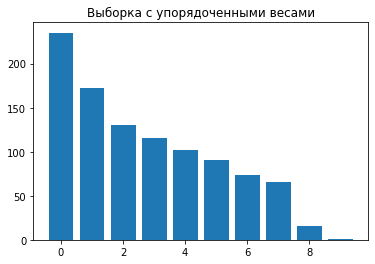

In [7]:
# Теперь сравним с выборкой с упорядоченными весами

A = np.sort(A)[::-1]
B = [A[:i].sum() for i in range(1,11)]
Rand = [np.random.rand() for i in range(1000)]
C = []
index = np.argsort(A)[::-1]
start_time = time.time()
for i in range(1000):
    t = 0
    while t != - 1:
        if Rand[i]< B[t]:
            C.append(t)
            t = - 1
        else:
            t += 1
end_time = time.time()
print("The generation time of the sample --> ", end_time - start_time)
plt.bar(index, [C.count(i) for i in range(10)])
plt.title("Выборка с упорядоченными весами")

ЗАДАЧА 2. Смоделируйте выборку размера 1000 из распределения  𝐸𝑥𝑝(𝜆) . Постройте выборочную гистограмму и точный график плотности распределения.

In [31]:
import math
from scipy.stats import expon

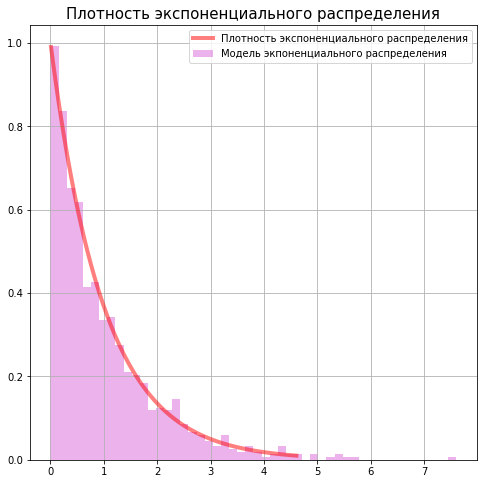

In [32]:
Rand = np.array([np.random.rand() for i in range(1000)])
DistributionFunction = np.array([ - math.log(1 - Rand[i]) for i in range (1000)])
plt.figure(figsize = (8, 8))
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
plt.hist(DistributionFunction, bins = 50, density = True, color = 'm', alpha = 0.3, label = 'Модель экпоненциального распределения')
plt.legend(loc='upper right')
plt.plot(x, expon.pdf(x), 'r-', lw = 4, alpha=0.5, label= 'Плотность экспоненциального распределения')
plt.legend(loc='upper right')
plt.title("Плотность экспоненциального распределения", size = 15)
grid1 = plt.grid(True)

ЗАДАЧА 3. Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

In [33]:
from scipy import stats
import math

<BarContainer object of 1000 artists>

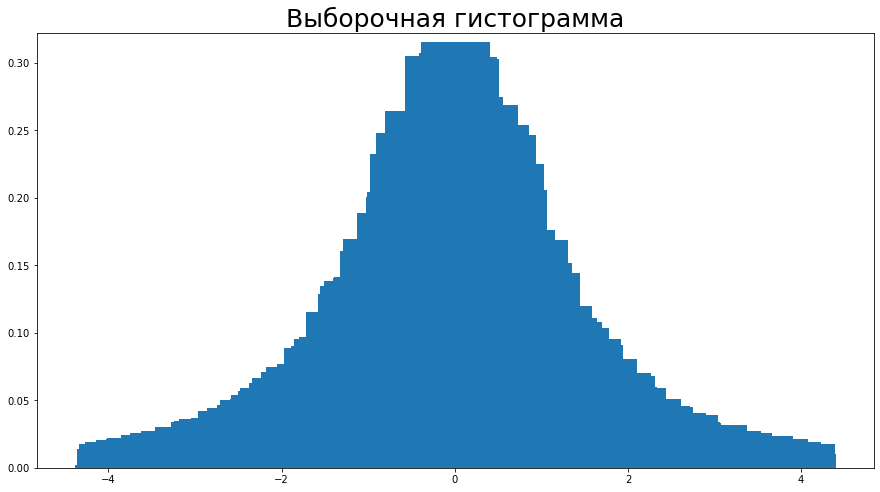

In [56]:
Rand = [8 * np.random.rand() - 4 for i in range(1000)]
Rand.sort()
DistributionFunction = []
t = 0
while t != 1000:
    z = 1 / math.pi * np.random.rand()
    if z < 1 / (math.pi * (1 + Rand[t] * Rand[t])):
        DistributionFunction.append(z)
        t += 1
plt.figure(figsize = (15, 8))
plt.ylim(bottom = 0)
plt.ylim(top = 0.322)
plt.title("Выборочная гистограмма", size = 25)
plt.bar(Rand, DistributionFunction)

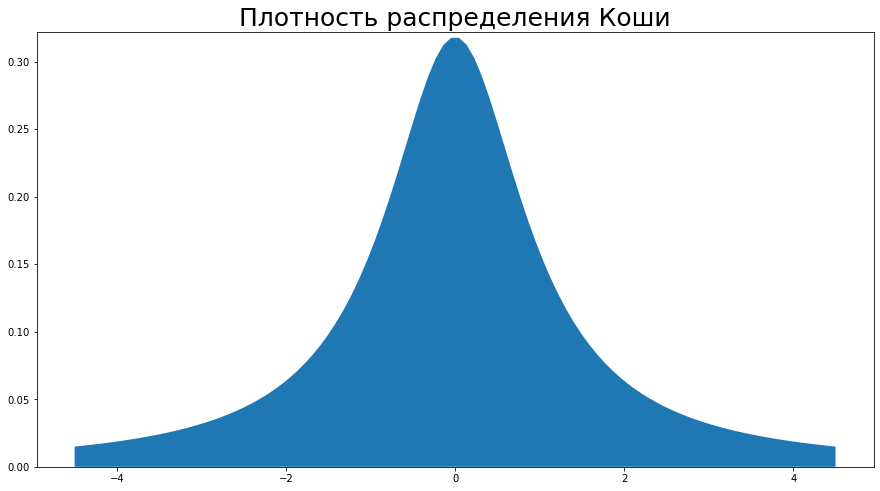

In [57]:
plt.figure(figsize = (15, 8))
dist = stats.cauchy()
x = np.linspace(-4.5, 4.5, 100)
plt.title("Плотность распределения Коши", size = 25)
plt.ylim(bottom = 0)
plt.ylim(top = 0.322)
plt.fill_between(x, 0, dist.pdf(x))

Из достаточного условия существования условной плотности p(y|x) = p(x, y) / p(y). В нашей задаче плотность задана p(y|x) = 1 / (cg(x)). Следовательно совместная плотность p(x, y) = p(y|x) p(x) = 1 / c. Совместная плотность x и y под графиком функции f равна p(x,y|y < f) = p(x, y) / p(y < f) = 1. Заметим, что плотность p(x|y < f) является интегралом от 0 до f(x) совместной плотности х и у, а значит, равна f(x).

ЗАДАЧА 4. Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

In [61]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import math

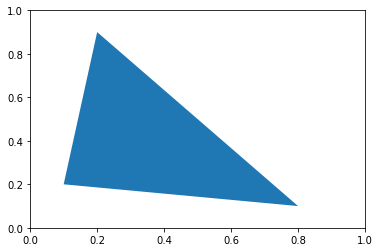

In [60]:
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))

Text(0.5, 1.0, 'Выборка внутри треугольника')

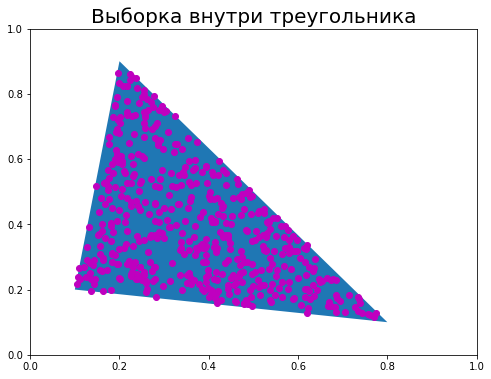

In [70]:
x_num = np.array([np.random.rand() for i in range(500)])
y_num = np.array([np.random.rand() for i in range(500)])
for i in range(500):
    if y_num[i] >- x_num[i] + 1:
        x_num[i] =- x_num[i] + 1
        y_num[i] =- y_num[i] + 1     
x_num *= math.hypot(0.7, 0.1)
y_num *= math.hypot(0.7, 0.1)

A = math.atan2(-1, 7)
x = x_num
x_num = x_num * math.cos(A) - y_num * math.sin(A) + 0.1
y_num = x * math.sin(A) + y_num * math.cos(A) + 0.2

plt.figure(figsize=(8,6))
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x_num, y_num, color = 'm')
plt.xlim(left = 0)
plt.xlim(right = 1)
plt.ylim(bottom = 0)
plt.ylim(top = 1)
plt.title("Выборка внутри треугольника", size = 20)

ЗАДАЧА 5. Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

In [73]:
from matplotlib.patches import Circle

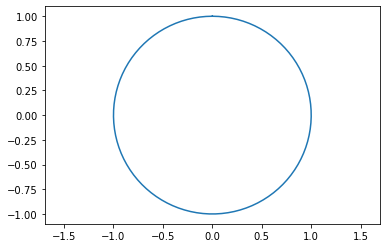

In [76]:
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Выборка внутри круга')

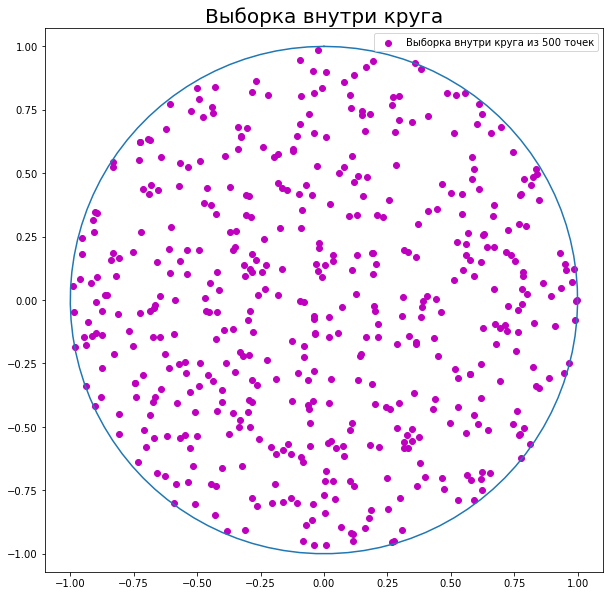

In [86]:
A = 2 * np.pi * np.random.rand(1, 500)
Rand = np.sqrt(np.random.rand(1, 500))
t = np.linspace(0, 2 * np.pi, 100)
x_num = Rand * np.cos(A)
y_num = Rand * np.sin(A)

plt.figure(figsize = (10,10))
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.scatter(x_num, y_num, color = 'm', label = 'Выборка внутри круга из 500 точек')
plt.legend(loc = 'upper right')
plt.title("Выборка внутри круга", size = 20)

ЗАДАЧА 6. Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

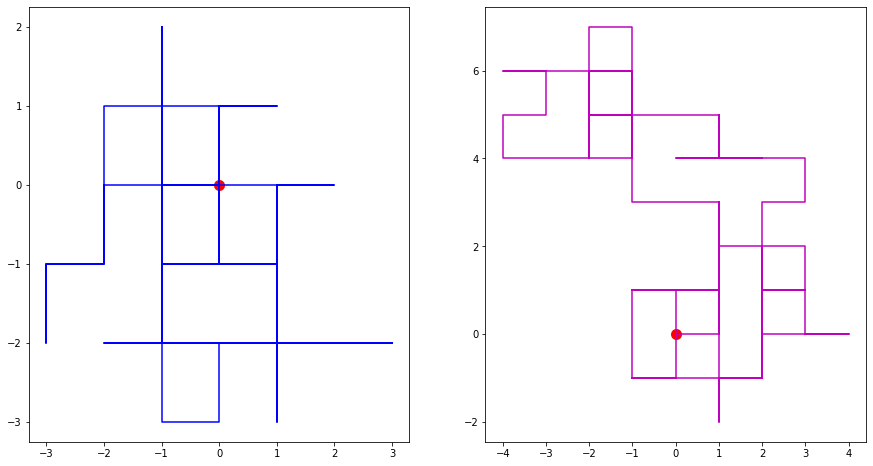

In [92]:
def RandomWalk(n):
    X_start = np.random.choice(np.arange(n), n//2, replace = False)
    Y_start = np.random.choice(np.arange(n), n//2, replace = False)
    X_new = np.ones(n)
    Y_new = np.ones(n)
    X_new[-X_start] = -1
    Y_new[-Y_start] = -1
    Xnew = np.cumsum(X_new)
    Ynew = np.cumsum(Y_new)
    X = (Xnew + Ynew) / 2
    Y = (Xnew - Ynew) / 2
    return X, Y

X, Y = RandomWalk(100)
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.plot(X, Y, color = 'blue')
plt.scatter([0], [0], color = 'red', lw = 5)
X, Y = RandomWalk(100)
plt.subplot(1,2,2)
plt.plot(X,Y,color = 'm')
plt.scatter([0], [0], color = 'red', lw = 5)

ЗАДАЧА 7. Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

Text(0.5, 1.0, 'Histogram of y')

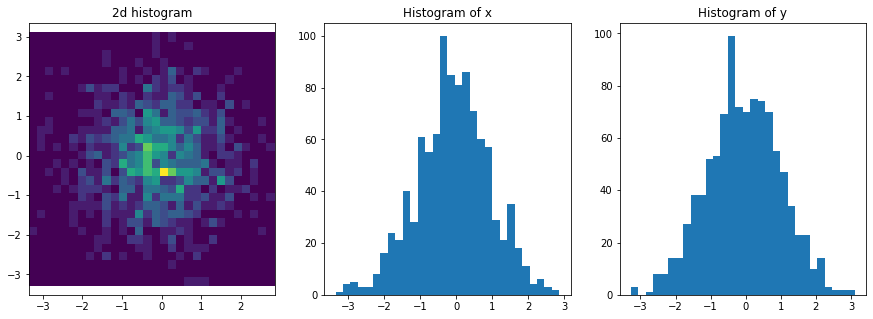

In [93]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")